<a href="https://colab.research.google.com/github/Ariqueeezz/MachineLearningProject/blob/main/Experiment_DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries***

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Oversampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Data Loading***

In [8]:
data = pd.read_csv("/content/drive/MyDrive/Kuliah-Datasets/Diabetes/diabetes_binary_health_indicators_BRFSS2015.csv")

# ***EDA (Exploratory Data Analysis)***

In [9]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [11]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [12]:
data.groupby('Diabetes_binary')['Diabetes_binary'].count()

,Diabetes_binary
Diabetes_binary,
0.0,218334
1.0,35346


In [13]:
data_vis = data.copy()

nama_target = {
    0: 'Tidak Diabetes',
    1: 'Diabetes',
}

data_vis['Diabetes_binary'] = data_vis['Diabetes_binary'].map(nama_target)
data_vis.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Tidak Diabetes,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,Tidak Diabetes,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,Tidak Diabetes,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,Tidak Diabetes,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,Tidak Diabetes,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


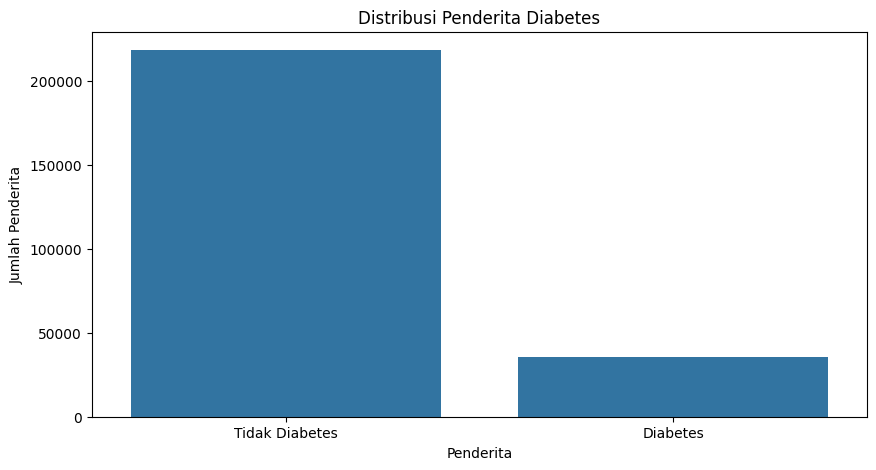

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data_vis, x='Diabetes_binary')
plt.title("Distribusi Penderita Diabetes")
plt.xlabel("Penderita")
plt.ylabel("Jumlah Penderita")
plt.show()

Text(0.5, 0, 'Fitur')

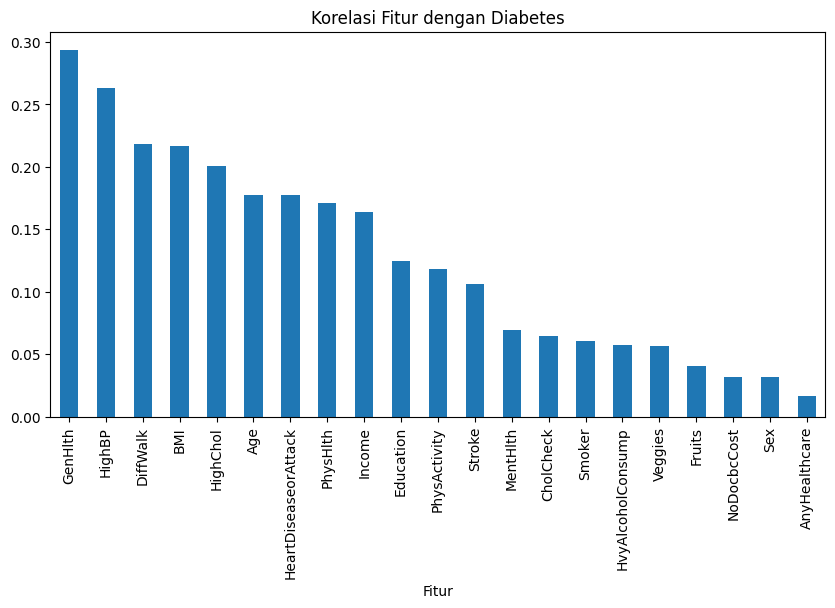

In [34]:
target_corr = data.corr()['Diabetes_binary'].abs().sort_values(ascending=False)
target_corr[1:].plot(kind='bar', figsize=(10,5))
plt.title("Korelasi Fitur dengan Diabetes")
plt.xlabel("Fitur")

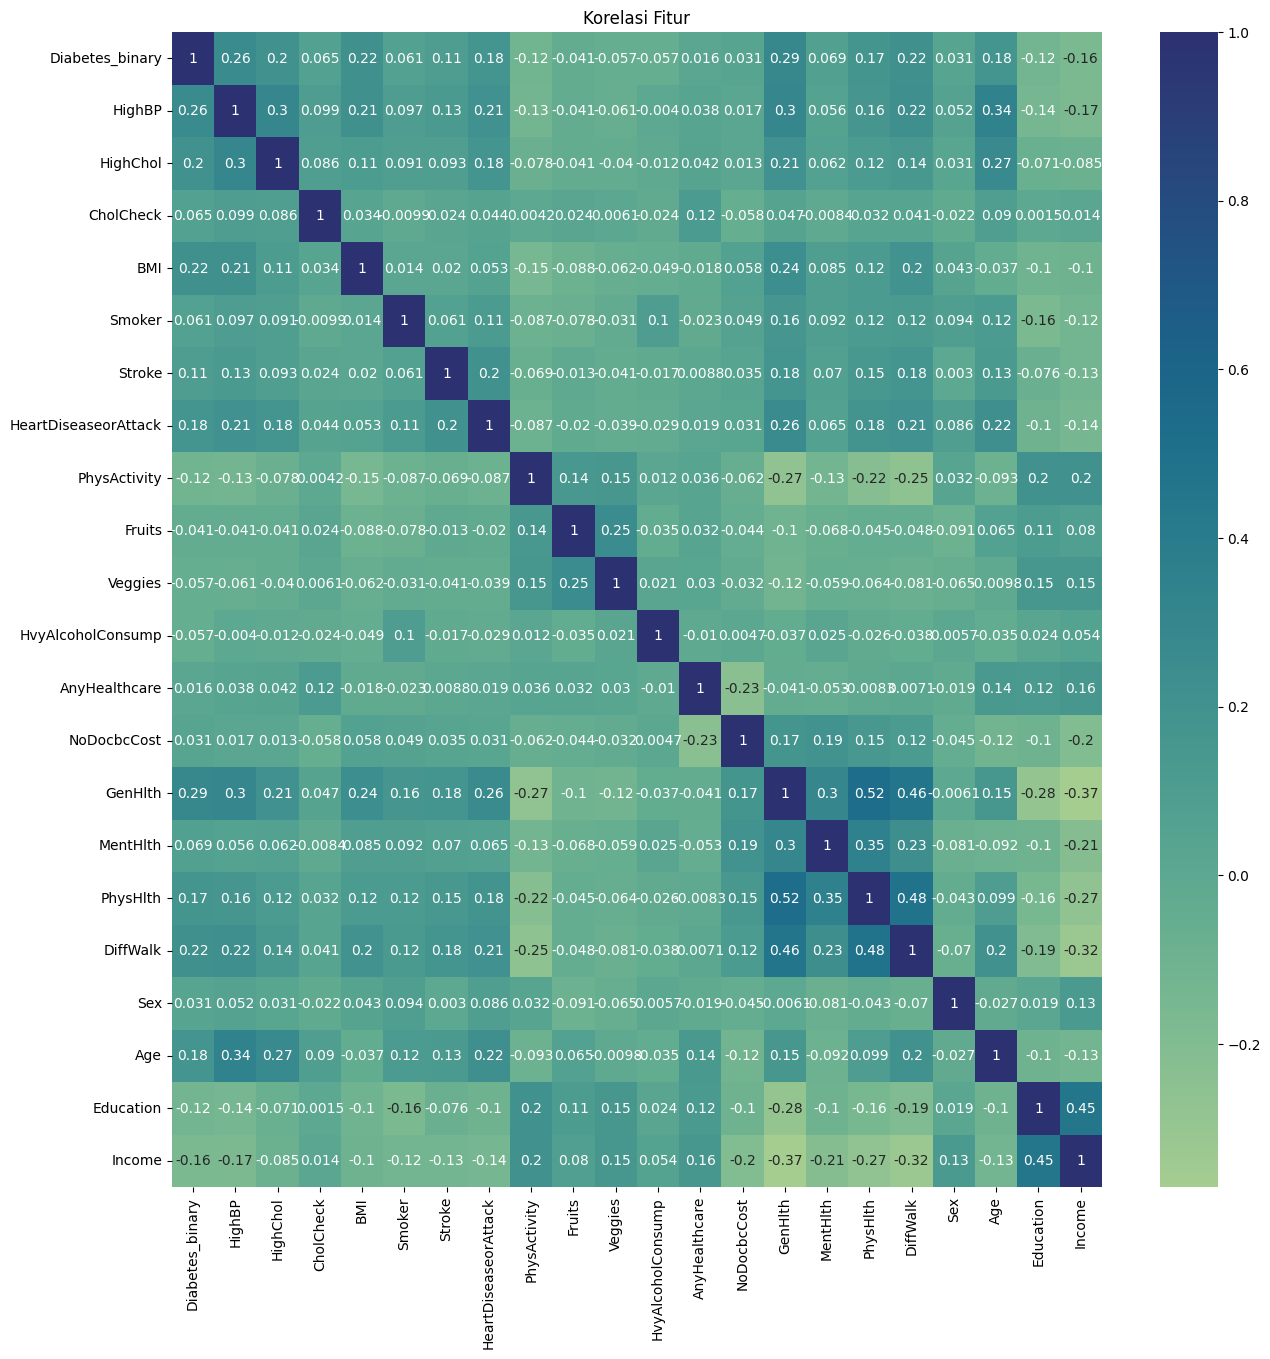

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='crest')
plt.title("Korelasi Fitur")
plt.show()

# ***Feature Scaling***

**Feature Scaling:** Penyesuaian Rentang Nilai pada Fitur-Fitur Numerik agar semua fitur dalam rentang yang seragam.

*Bagaimana jika nilai pada fitur-fitur yang kita punya tidak dalam rentang nilai yang sama?*

Misalkan ada fitur
- BMI: Skala nilai 12-98
- MentalHealth: Skala nilai 0-30
- Smoker: Biner 0 dan 1 (Ya/Tidak)

Algoritma akan mengira bahwa BMI adalah Fitur paling penting/berkontribusi karena memiliki nilai fitur yang lebih besar daripada fitur fitur lainnya padahal belum tentu fitur BMI paling penting/paling mempengaruhi nilai target. Maka ***Feature Scaling*** ini memastikan **agar semua fitur dapat berkontribusi dengan seimbang** dalam proses training model.

**Alasanku memakai Normalization **(MinMaxScaler), karena nilai fitur pada dataset kebanyakan biner 0/1, maka dari itu akan lebih bagus jika menyesuaikan nilai skala fitur menjadi [0, 1].

> Skala nilai Fitur akan sangat berpengaruh pada algoritma berbasis jarak atau kemiripan antar data







In [17]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Diabetes_binary']))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns.drop('Diabetes_binary'))

data_scaled['Diabetes_binary'] = data['Diabetes_binary']

data_scaled.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,0.190493,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,0.377848,0.106159,0.141403,0.168224,0.440342,0.586010,0.810087,0.721982,0.139333
std,0.494934,0.494210,0.189571,0.076845,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,0.267119,0.247095,0.290598,0.374066,0.496429,0.254518,0.197155,0.295878,0.346294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.139535,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429,0.000000
50%,0.000000,0.000000,1.000000,0.174419,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.857143,0.000000
75%,1.000000,1.000000,1.000000,0.220930,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.066667,0.100000,0.000000,1.000000,0.750000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ***Oversampling - SMOTE (Synthetic Minority Oversampling Technique)***

**Oversampling**: metode yang menambahkan sampel pada kelas minoritas sehingga jumlah nya seimbang dengan kelas mayoritas. Metode ini memastikan agar model bisa memiliki kesempatan yang seimbang dalam mempelajari kelas minoritas.

Metode yang saya pakai untuk over sampling ini adalah SMOTE yang lebih bagus daripada Random Oversampling, karena data baru yang dibuat untuk menambahkan kelas minoritas adalah data sintetis hasil dari interpolasi daripada menduplikasi data yang sudah ada.

In [18]:
X = data_scaled.drop(columns=['Diabetes_binary'])
y = data_scaled['Diabetes_binary']

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Jumlah kelas sebelum oversampling:", Counter(y))
print("Jumlah kelas setelah oversampling:", Counter(y_resampled))

Jumlah kelas sebelum oversampling: Counter({0.0: 218334, 1.0: 35346})
Jumlah kelas setelah oversampling: Counter({0.0: 218334, 1.0: 218334})


## **Data Manipulation**

Data dengan kelas "Tidak Diabetes" dibuat sangat dikit, agar Data dengan kelas "Diabetes" terlihat banyak.

In [20]:
df = pd.concat([X_resampled, y_resampled], axis=1)

In [21]:
n_remove = 214000
mayor_idx = df[df['Diabetes_binary'] == 0].sample(n=n_remove, random_state=42).index
df = df.drop(index=mayor_idx).reset_index(drop=True)

In [22]:
X_recreate = df.drop(columns=['Diabetes_binary'])
y_recreate = df['Diabetes_binary']

print("Jumlah kelas sebelum oversampling:", Counter(y_recreate))

Jumlah kelas sebelum oversampling: Counter({1.0: 218334, 0.0: 4334})


## **Visualisasi Setelah SMOTE dan Data Manipulation**

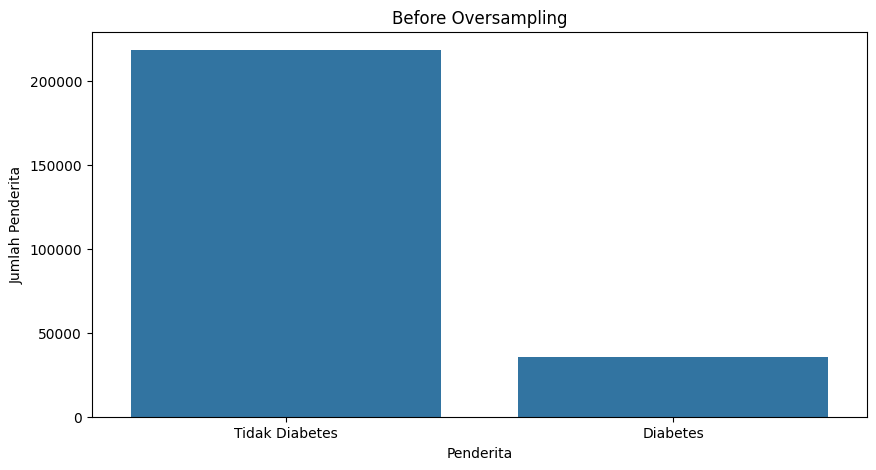

In [23]:
y_vis = y.copy()
y_vis = y.map(nama_target)

plt.figure(figsize=(10,5))
sns.barplot(data=y_vis.value_counts())
plt.title("Before Oversampling")
plt.xlabel("Penderita")
plt.ylabel("Jumlah Penderita")
plt.show()

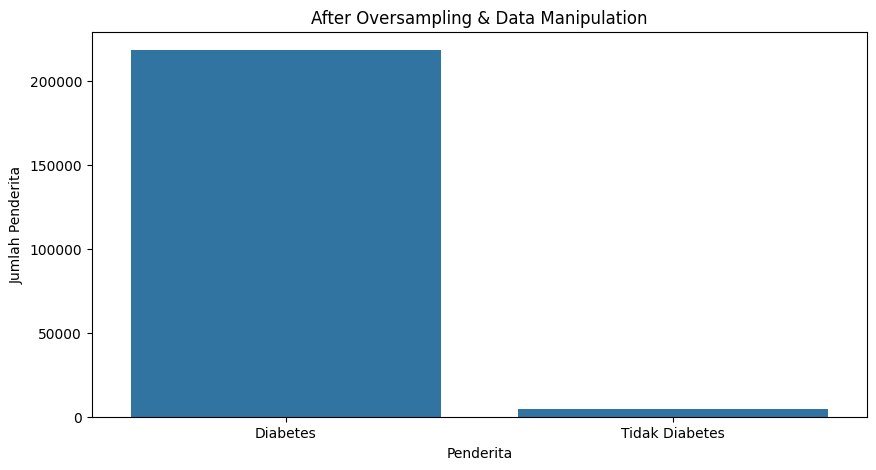

In [25]:
y_vis2 = y_recreate.copy()
y_vis2 = y_recreate.map(nama_target)

plt.figure(figsize=(10,5))
sns.barplot(data=y_vis2.value_counts())
plt.title("After Oversampling & Data Manipulation")
plt.xlabel("Penderita")
plt.ylabel("Jumlah Penderita")
plt.show()

# ***Model Selection***

In [26]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_recreate, y_recreate, test_size=0.2, random_state=42)

In [45]:
# parameters = {
#   max_depth: 20,
#   max_features= None,
#   min_samples_leaf = 5,
#   min_samples_split = 20
# }

dtc = DecisionTreeClassifier(max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=20)
nb = GaussianNB(var_smoothing=np.float64(3.132022597188197e-05))
knn = KNeighborsClassifier()


In [37]:
def train_and_evaluate(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  results = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision' : precision_score(y_test, y_pred),
    'Recall' : recall_score(y_test, y_pred),
    'F1_Score' : f1_score(y_test, y_pred),
    'Conffussion' : confusion_matrix(y_test, y_pred)
  }

  return results

## **Model Evaluation**

### **TUJUAN UTAMA:** ACCURACY SCORE > 0.95.
Metrik Evaluasi yang digunakan:
- Accuracy Score: Proporsi Prediksi yang Benar dari seluruh data yang diprediksi.
- Precision Score: Dari semua hasil prediksi yang positif, ada berapa banyak hasil prediksi yang benar benar positif.
- Recall Score: Dari semua yang benar benar positif, ada berapa banyak prediksi yang berhasil diprediksi positif
- F1-Score: Rata-Rata Harmoni antara Precision dan Recall
- Confusion Matrix: Untuk melihat hasil prediksi (TP, TN, FP, FN)
- ROC Curve dan AUC: Untuk menilai seberapa baik model dalam membedakan mana yang benar-benar sakit dan mana yang tidak.

In [46]:
results = {
    'Decision Tree' : train_and_evaluate(X_train, y_train, X_test, y_test, dtc),
    'Naive Bayes' : train_and_evaluate(X_train, y_train, X_test, y_test, nb),
    'KNN' : train_and_evaluate(X_train, y_train, X_test, y_test, knn)
}

evaluation_model = pd.DataFrame(results).T
cm = evaluation_model['Conffussion']
evaluation_model.drop(columns='Conffussion', inplace=True)
evaluation_model

,Accuracy,Precision,Recall,F1_Score
Decision Tree,0.98015,0.986326,0.993548,0.989924
Naive Bayes,0.937059,0.988324,0.947055,0.96725
KNN,0.983249,0.983501,0.999703,0.991535


In [40]:
cm.index

Index(['Decision Tree', 'Naive Bayes', 'KNN'], dtype='object')

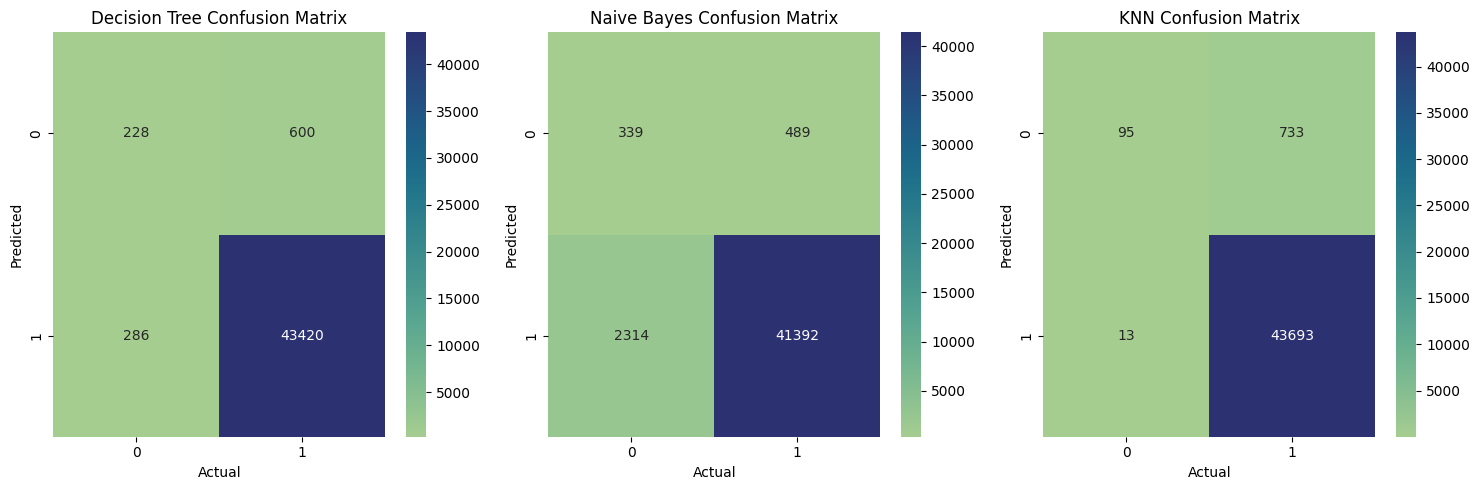

In [44]:
plt.figure(figsize=(15, 5))

for i, idx in enumerate(cm.index):
  plt.subplot(1, 3, i+1)
  sns.heatmap(cm[idx], annot=True, fmt='g', cmap='crest')
  plt.title(f"{idx} Confusion Matrix")
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

**Ringkasan Hasil Evaluasi:**

> ### **Decision Tree**
> - Acccuracy Score   : **98%** Hasil prediksi benar dari Seluruh hasil prediksi
> - Precision Score   : Dari hasil *prediksi* yang POSITIF, ada **98%** yang *benar-benar* POSITIF
> - Recall Score      : Dari data yang benar benar POSITIF, ada **99%** yang berhasil diprediksi dengan BENAR.
> - F1-Score          : Model sangat seimbang dalam menghindari False Positif (Precision) dan menangkap semua kasus yang positif (Recall)

> ### **Naive Bayes**
> - Acccuracy Score   : **93%** Hasil prediksi benar dari Seluruh hasil prediksi
> - Precision Score   : Dari hasil *prediksi* yang POSITIF, ada **98%** yang *benar-benar* POSITIF
> - Recall Score      : Dari data yang benar benar POSITIF, ada **94%** yang berhasil diprediksi dengan BENAR.
> - F1-Score          : Model cukup seimbang dalam menghindari False Positif (Precision) dan menangkap semua kasus yang positif (Recall)

> ### **K-Nearest Neighbor**
> - Acccuracy Score   : **98%** Hasil prediksi benar dari Seluruh hasil prediksi
> - Precision Score   : Dari hasil *prediksi* yang POSITIF, ada **98%** yang *benar-benar* POSITIF
> - Recall Score      : Dari data yang benar benar POSITIF, ada **99%** yang berhasil diprediksi dengan BENAR.
> - F1-Score          : Model sangat seimbang dalam menghindari False Positif (Precision) dan menangkap semua kasus yang positif (Recall)



In [52]:
def roc_auc_evaluation(model, X_test, y_test):

  y_prob = model.predict_proba(X_test)[:, 1]

  roc_auc = roc_auc_score(y_test, y_prob)
  print("AUC Score:", roc_auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_prob)

  plt.figure(figsize=(6,6))
  plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{model.__class__.__name__}')
  plt.legend(loc="lower right")
  plt.show()

  # return fpr, tpr, thresholds


AUC Score: 0.7884516182016377


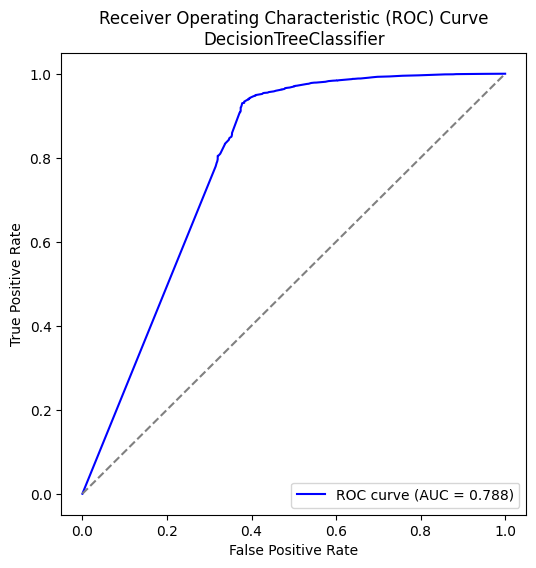

AUC Score: 0.7883971949373625


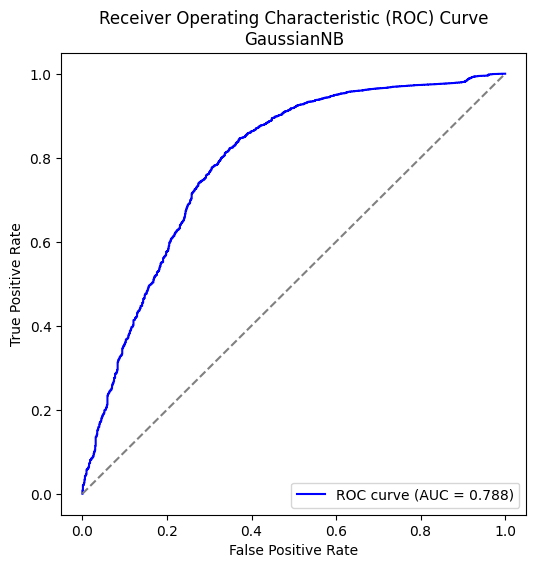

AUC Score: 0.6719829035511989


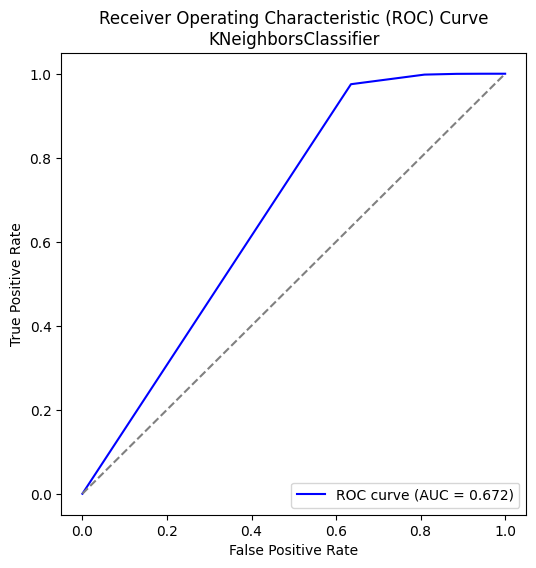

In [54]:
model_list = [dtc, nb, knn]

for model in model_list:
  roc_auc_evaluation(model, X_test, y_test)
  print("\n")

**Ringkasan Hasil Evaluasi ROC & AUC:**

ROC (Receiver Operating Characteristic) adalah Kurva yang menunjukkan performa model dalam membedakan kedua kelas (Diabetes dan Tidak Diabetes)

AUC (Area Under Curve) adalah nilai yang memberikan peluang model dalam memprediksi orang yang benar-benar sakit lebih tinggi daripada peluan model dalam memprediksi orang yang benar-benar sehat.

> ### **Decision Tree**
> - ROC   : Kurva menunjukkan bahwa peluang model dalam memprediksi orang yang benar benar DIABETES (True Positive Rate) lebih tinggi daripada peluang model dalam memprediksi orang yang sebenarnya ga DIABETES (False Positive Rate) yang terlihat di titik ketika **TPR = ~0.9** & **FPR = 0.4**. Dan seterusnya, peluang model dalam memprediksi orang yang benar-benar DIABETES hanya bertambah dangat sedikit seiring bertambahnya peluang model dalam memprediksi orang yang sebenarnya ga DIABETES.
> - AUC Score   : Model memberikan peluang lebih tinggi sebesar **78&** dalam memprediksi orang yang benar-benar DIABETES daripada orang yang benar-benar SEHAT.
> - Artinya Model sudah cukup bisa membedakan mana yang benar-benar sakit mana yang tidak berdasarkan AUC Score.

> ### **Naive Bayes**
> - ROC   : Kurva menunjukkan bahwa peluang model dalam memprediksi orang yang benar benar DIABETES (True Positive Rate) lebih tinggi daripada peluang model dalam memprediksi orang yang sebenarnya ga DIABETES (False Positive Rate) yang terlihat di titik ketika **TPR = ~0.8** & **FPR = 0.4**. Dan seterusnya, peluang model dalam memprediksi orang yang benar-benar DIABETES hanya bertambah sedikit secara pelan seiring bertambahnya peluang model dalam memprediksi orang yang sebenarnya ga DIABETES.
> - AUC Score   : Model memberikan peluang lebih tinggi sebesar **78&** dalam memprediksi orang yang benar-benar DIABETES daripada orang yang benar-benar SEHAT.
> - Artinya Model sudah cukup bisa membedakan mana yang benar-benar sakit mana yang tidak berdasarkan AUC Score.

> ### **K-Nearest Neighbor**
> - ROC   : Kurva menunjukkan bahwa peluang model dalam memprediksi orang yang benar benar DIABETES (True Positive Rate) lebih tinggi daripada peluang model dalam memprediksi orang yang sebenarnya ga DIABETES (False Positive Rate) yang terlihat di titik ketika **TPR = ~0.9** & **FPR = 0.6**. Dan seterusnya, peluang model dalam memprediksi orang yang benar-benar DIABETES hanya bertambah sedikit seiring bertambahnya peluang model dalam memprediksi orang yang sebenarnya ga DIABETES.
> - AUC Score   : Model memberikan peluang lebih tinggi sebesar **67&** dalam memprediksi orang yang benar-benar DIABETES daripada orang yang benar-benar SEHAT.
> - Artinya Model belum cukup bisa membedakan mana yang benar-benar sakit mana yang tidak berdasarkan AUC Score.